# Mid-semester assignment Part 1 - Basics of deep learning
Hello dear students,<br> this is the template notebook. Please upload it into your drive and open as Google Colab nootebook".

---
<br>

### Name and ID:
Student 1: Ori Malca 315150599
<br>
Student 2: Maor Sisai 311304059

## Fashion MNIST
Fashion MNIST dataset contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  
</table>

We will use 60,000 images to train the network and 10,000 images to evaluate how accurately the network learned to classify images.

Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

<br>

# Goodluck!

#Neural Network in plain NumPy

## Import Libraries

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Load Dataset

In [ ]:
X, y = fetch_openml('Fashion-MNIST', version=1, return_X_y=True, as_frame=False)
print(X.shape, y.shape)

(70000, 784) (70000,)


## Data preprocessing (10%)

### Feature scaling

In [ ]:
examples = y.shape[0]
y1 = y.reshape(1, examples)
X1 = X / 255
X1 = X1.T
print(X1.shape)

(784, 70000)


### Select two classes

In [ ]:
#TODO: select two classes (for example 2-Pullover and 4-Coat)

indexes = np.nonzero((y1=='7') | (y1=='9'))
y2 = y1[indexes]
y2 = y2.reshape(1, y2.shape[0])
X2 = X1.T[indexes[1]]
X2 = X2.T

y2[y2=='7'] = 0
y2[y2=='9'] = 1

### Split the data into Train set and Test set

In [ ]:
# TODO: Split the data into Train set and Test set (The use of libraries other than Numpy is strictly prohibited)
from sklearn.utils import shuffle

X = X2
Y = y2

# Use shuffle on the train data
X_T, Y_T = shuffle(X.T, Y.T)
split_point = int(X_T.shape[0] * 5/6)
X_train, X_test = (X_T[:split_point]).T, (X_T[split_point:]).T
Y_train, Y_test = Y_T[:split_point], Y_T[split_point:]

### Test yourself

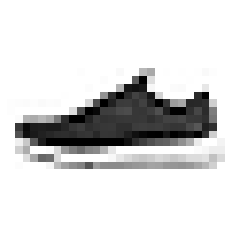

0

In [ ]:
# Test yourself (Check that the classes you have selected are actually displayed)
%matplotlib inline
from numpy import random

i = random.randint(100)
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
Y_train[i,0]

## Activation functions (10%)

In [ ]:
#TODO: Sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

## Loss function (20%)
BCE Loss function captures the intuition that the neural network should pay a high penalty(Loss→∞) when the estimated probability, with respect to the training example’s label, is completely wrong. On the other hand, the Loss should equal zero(Loss=0) when the estimated probability, with respect to the training example’s label, is correct. Simply put, the BCE Loss should equal zero in only two instances:<br>
* if the example is positively labeled(y=1) the neural network model should be completely sure that the example belongs to the positive class i.e p̂=1.
* if the example is negatively labeled(y=0) the neural network model should be completely sure that the example does not belong to the positive class i.e p̂=0.

<b> When we work with a computer, there are very high values or very low values that it cannot handle and that could cause the system to crash. <br>In order to overcome the case where the function returns values that strive for infinity you will need to understand which range of values causes the logarithm to return inf \ -inf and handle this within the function. </b>

In [ ]:
#TODO: Binary cross entropy
def log_loss(y_hat, y, EPSILON=1e-07):
    '''
    Logistic loss, assuming a single value in y_hat and y.
    '''
    if y_hat < EPSILON:
      y_hat = EPSILON
    elif y_hat > 1. - EPSILON:
      y_hat = 1. - EPSILON

    return -np.log(y_hat) if y == 1 else -np.log(1 - y_hat)

## NN Hyper Parameters

In [ ]:
input_layer = X_train.shape[0] # 28X28 = 784
hidden_layer = 64
learning_rate = 0.01
epochs = 10

## Weight and Bias Initialization

In [ ]:
W1 = np.random.randn(hidden_layer, input_layer)
b1 = np.zeros((hidden_layer, 1))
W2 = np.random.randn(1, hidden_layer)
b2 = np.zeros((1, 1))

print(W1.shape)
print(b1.shape)
print(W2.shape)
print(b2.shape)

(64, 784)
(64, 1)
(1, 64)
(1, 1)


## Training (30%)

In [ ]:
X = X_train
Y = Y_train
loss_list = []
epoch_list = []
accuracy_list = []
numOfTraining = X_train.shape[1] # Write the number of examples in your train set
preds = np.zeros((Y.shape[0], 1))

for i in range(epochs):
  avg_epoch_loss = 0
  for j in range(numOfTraining):
    # TODO :  Forward propagation
    X_j = X[:,j].reshape(X.shape[0], 1)             # 784 x 1
    Z1 = np.matmul(W1, X_j) + b1                    # hidden_layer x 1
    A1 = sigmoid(Z1)                                # hidden_layer x 1
    Z2 = np.dot(W2, A1) + b2                        # 1 x 1
    A2 = sigmoid(Z2)                                # 1 x 1
    Yout = Y[j,0]
    preds[j,0] = 1 if A2[0,0] > 0.5 else 0

    # TODO: Compute loss
    loss = log_loss(A2[0,0], Yout)
    avg_epoch_loss = avg_epoch_loss + loss

    # # TODO: Back propagation
    dZ2 = A2-Yout                                  # 1 x 1
    dW2 = np.dot(dZ2, A1.T)                         # 1 x hidden_layer
    db2 = dZ2                                       # 1 x 1

    dA1 = np.dot(W2.T, dZ2)                         # hidden_layer x 1
    dZ1 = np.multiply(np.multiply(A1, (1-A1)), dA1) # hidden_layer x 1
    dW1 = np.dot(dZ1, X_j.T)                        # hidden_layer x 784
    db1 = dZ1                                       # hidden_layer x 1

    # TODO: Update weights
    W2 = W2 - learning_rate * dW2                   # (1 x hidden_layer) - learning_rate * (1 x hidden_layer)
    b2 = b2 - learning_rate * db2                   # (1 x 1) - learning_rate * (1 x 1)
    W1 = W1 - learning_rate * dW1                   # (hidden_layer x 784) - learning_rate * (hidden_layer x 784)
    b1 = b1 - learning_rate * db1                   # (hidden_layer x 1) - learning_rate * (hidden_layer x 1)
  
  accuracy_list.append(accuracy_score(preds, Y_train.astype(int)))
  avg_epoch_loss = avg_epoch_loss/numOfTraining
  loss_list.append(avg_epoch_loss)
  epoch_list.append(i)
  print(f"Epoch: {i}, Average Epoch Loss: {avg_epoch_loss}, Accuracy: {accuracy_list[i]}")

Epoch: 0, Average Epoch Loss: 0.20151213214436098, Accuracy: 0.923281330361735
Epoch: 1, Average Epoch Loss: 0.15354639032042905, Accuracy: 0.940510886336362
Epoch: 2, Average Epoch Loss: 0.13837569042662856, Accuracy: 0.9464255100291445
Epoch: 3, Average Epoch Loss: 0.12814894064428192, Accuracy: 0.9511400651465798
Epoch: 4, Average Epoch Loss: 0.12034613259546978, Accuracy: 0.9544831133207612
Epoch: 5, Average Epoch Loss: 0.11408139185494319, Accuracy: 0.9571404080233156
Epoch: 6, Average Epoch Loss: 0.10884398514131824, Accuracy: 0.9593691068061032
Epoch: 7, Average Epoch Loss: 0.10438158027497373, Accuracy: 0.9607406137493572
Epoch: 8, Average Epoch Loss: 0.10047233176545768, Accuracy: 0.9621978398765644
Epoch: 9, Average Epoch Loss: 0.09700930400125501, Accuracy: 0.9632264700840047


### Loss Visualization

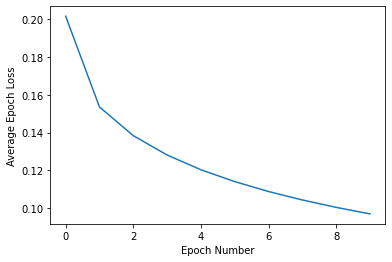

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Average Epoch Loss")
plt.plot(epoch_list, loss_list)

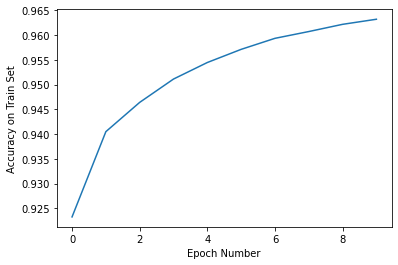

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel("Accuracy on Train Set")
plt.plot(epoch_list, accuracy_list)

## Results

### Test your performance (30%)

In [ ]:
#TODO: Forward batch of examples
X = X_test
Y = Y_test

Z1 = np.matmul(W1, X_test) + b1 # (hidden_layer, 784) * (784, 1000) + (hidden_layer, 1) = (hidden_layer, 1000)
A1 = sigmoid(Z1)                # (hidden_layer, 1000)
Z2 = np.dot(W2, A1) + b2        # (1, hidden_layer) * (hidden_layer, 1000) + (1, 1) = (1, 1000)
A2 = sigmoid(Z2)                # (1, 1000)

predictions = np.zeros((1,Y.shape[0]))
labels = np.zeros((1,Y.shape[0]))

# Check your predictions against the test's labels
for i in range(Y.shape[0]):
  if (A2[0,i] > 0.5): 
    predictions[0,i] = 1
  labels[0,i] = Y[i,0]

# Accuracy on the test set:
print(f'Accuracy on Test Set: {accuracy_score(predictions[0], labels[0])}')

# Print the confusion matrix In order to test your performance
print(confusion_matrix(predictions.T, labels.T))

Accuracy on Test Set: 0.9532990574121679
[[1095   63]
 [  46 1130]]


### Visualize the results

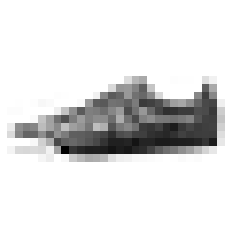

Real= 0 Predicted= [[0.00126991]]


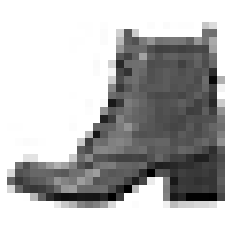

Real= 1 Predicted= [[0.99657988]]


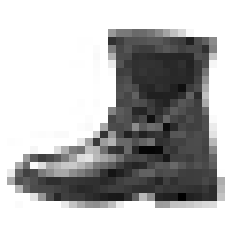

Real= 1 Predicted= [[0.99787341]]


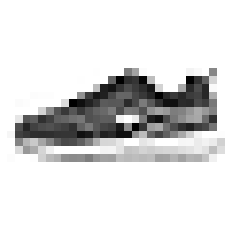

Real= 0 Predicted= [[0.00213418]]


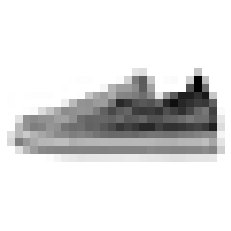

Real= 0 Predicted= [[0.00046359]]


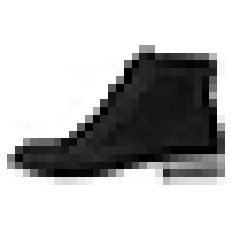

Real= 1 Predicted= [[0.99913002]]


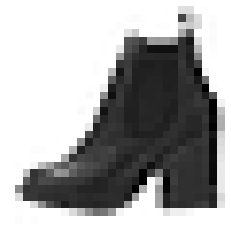

Real= 1 Predicted= [[0.99195052]]


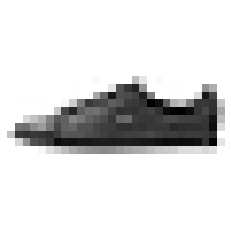

Real= 0 Predicted= [[0.00141743]]


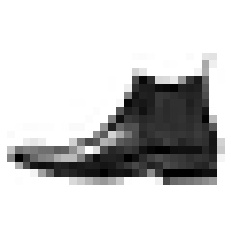

Real= 1 Predicted= [[0.94530552]]


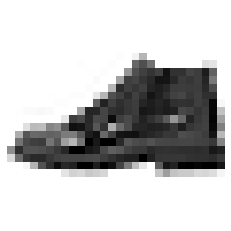

Real= 1 Predicted= [[0.66993074]]


In [ ]:
#TODO: SHOW VISUALLY RESULTS ON 10 TEST EXAMPLES
%matplotlib inline
from numpy import random

for example in range(10):
  i = random.randint(2000)
  plt.imshow(X_test[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
  plt.axis("off")
  plt.show()
  Y_test[i,0]

  Z1 = np.matmul(W1, X_test[:,i].reshape(X_test[:,i].shape[0],1)) + b1 # hidden_layer x 1
  A1 = sigmoid(Z1)                                                     # hidden_layer x 1
  Z2 = np.matmul(W2, A1) + b2                                          # 1 x 1
  A2 = sigmoid(Z2)                                                     # 1 x 1
  Yout = Y[i,0] 
  print("Real=", Y_test[i,0], "Predicted=",A2)